# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

Bouchouchi Nour 28600211  
Borchani Sofia 2828600211

# TME 03 - Opérateurs d'agrégation et LIME

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations


## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [169]:
def moyenne_ponderee(x, poids):
    return np.sum(x*poids.T)/ np.sum(poids)
    

In [170]:
x = np.random.randint(20, size=5)
print("x : ", x)
poids = np.random.random(5)
print("poids : ", poids)

print("moyenne pondérée : ", moyenne_ponderee(x, poids))

x :  [ 0  1 17 18 17]
poids :  [0.31614785 0.12154821 0.42577507 0.0032847  0.65153994]
moyenne pondérée :  12.181439460078046


<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

In [171]:
def lignes_niveaux(operateur):
    x1 = np.linspace(0.,1.)
    x2 = np.linspace(0.,1.)

    X, Y = np.meshgrid(x1, x2)
    Z = operateur(X,Y)
    plt.figure()
    plt.pcolormesh(X, Y, Z) 
    plt.show()

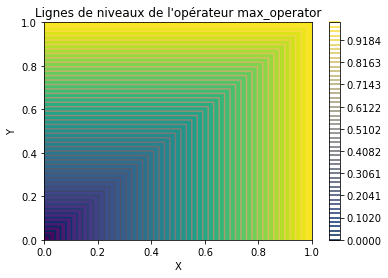

In [172]:
def lignes_niveaux(operateur):
    x1 = np.linspace(0, 1, 500)
    x2 = np.linspace(0, 1, 500)

    X, Y = np.meshgrid(x1, x2)
    Z = operateur(X, Y)

    levels = np.linspace(Z.min(), Z.max(), 50)
    plt.contourf(X, Y, Z, levels=levels, cmap='viridis')
    plt.contour(X, Y, Z, levels=levels, cmap='cividis')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Lignes de niveaux de l\'opérateur {operateur.__name__}')
    plt.show()

def max_operator(x, y):
    return np.maximum(x, y)

def min_operator(x, y):
    return np.minimum(x, y)

def mult_operator(x,y):
    return x*y

def max_zero_operator(x,y):
    return np.maximum(x+y-1, 0)

def min_un_operator(x,y):
    return np.minimum(x+y, 1)

def agg_disj_operator(x,y):
    return x+y-x*y

lignes_niveaux(max_operator)


<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [173]:
def owa(x, poids):
    x = np.sort(x)
    return np.sum(x*poids.T)/np.sum(poids)

In [174]:
x = np.random.randint(20, size=5)
print("x : ", x)
poids = np.random.random(5)
print("poids : ", poids)

print("OWA : ", owa(x, poids))

x :  [ 7  7  0  6 17]
poids :  [0.37197925 0.96730806 0.22972687 0.53410024 0.49490229]
OWA :  7.530350748431924


<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

In [175]:
def lignes_niveaux_owa(poids):
    x1 = np.linspace(0, 1, 500)
    x2 = np.linspace(0, 1, 500)

    X, Y = np.meshgrid(x1, x2)
    Z = np.zeros_like(X)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = owa([X[i, j], Y[i, j]], poids)

    levels = np.linspace(Z.min(), Z.max(), 50)
    plt.contourf(X, Y, Z, levels=levels, cmap='viridis')
    plt.contour(X, Y, Z, levels=levels, cmap='cividis')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Lignes de niveaux de l\'OWA avec poids {poids}')
    plt.show()

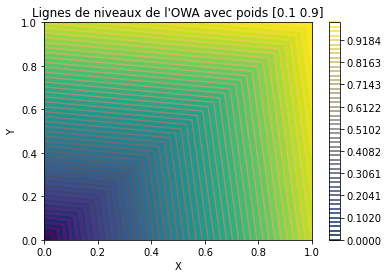

In [176]:
poids = np.array([0.1, 0.9])

lignes_niveaux_owa(poids)

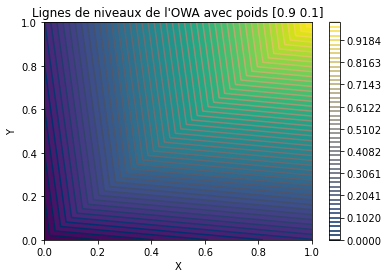

In [177]:
poids = np.array([0.9, 0.1])

lignes_niveaux_owa(poids)

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

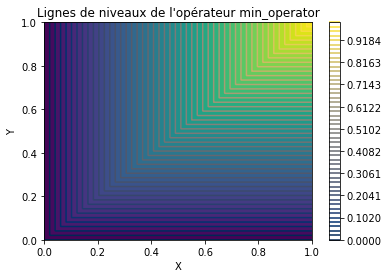

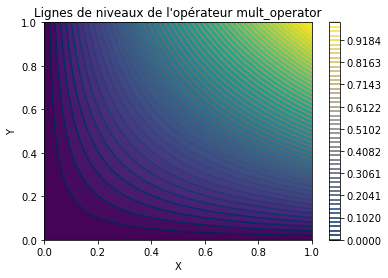

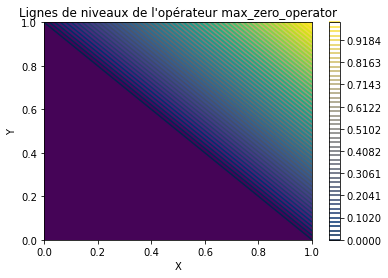

In [178]:
lignes_niveaux(min_operator)
lignes_niveaux(mult_operator)
lignes_niveaux(max_zero_operator)

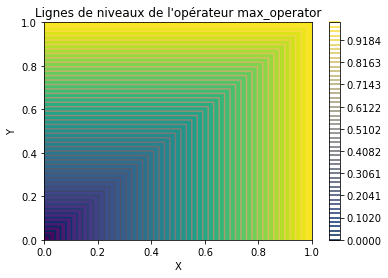

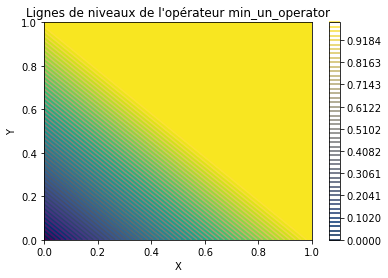

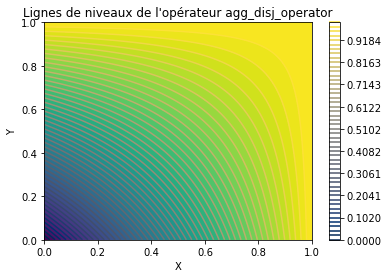

In [179]:
lignes_niveaux(max_operator)
lignes_niveaux(min_un_operator)
lignes_niveaux(agg_disj_operator)

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

In [180]:
def generate_combinaison(liste):
    l = list(liste)
    combinaisons = []
    for i in range(len(l) + 1):
        for c in combinations(l, i):
            combinaisons.append(list(c))
    return combinaisons


In [181]:
def check_val(elem, dico, mu):
    if mu>1 or mu<0: 
        return False
    liste = generate_combinaison(elem)
    for l in liste[1:-1] : 
        if dico[str(l)]>mu :
            print("valeur non conforme") 
            return False
    print(str(elem)+" : "+str(mu))
    return True

In [182]:
def create_dico(liste):
    dico = {}

    x = list(np.argsort(liste)+1)
    liste = generate_combinaison(x)    
    
    dico["[]"]=0
    print("[] : ",0)

    dico[str(liste[-1])]=1.0

    for elem in liste[1:-1]:
        mu = -1
        while (not check_val(elem, dico, mu)): 
            mu = input('entrer mu compris entre 0 et 1 pour '+str(elem)+" :")
            mu = float(mu)
        dico[str(elem)]= mu

    print(str(liste[-1])+": "+str(dico[str(liste[-1])]))
    return dico


In [183]:
dico_mu = create_dico([18,16])

[] :  0
[2] : 0.5
[1] : 0.5
[2, 1]: 1.0


In [184]:
def integrale_choquet(x, dico_mu, affiche = False):
    argsort = np.argsort(x)+1
    x = np.sort(x)
    res = 0
    equa_choquet = ""
    for i in range(len(x)):
        res += (dico_mu[str(list(argsort))] - dico_mu[str(list(argsort[1:]))]) * x[0]
        equa_choquet += "("+str(dico_mu[str(list(argsort))]) + " - " + str(dico_mu[str(list(argsort[1:]))]) +")*"+ str(x[0]) + " + "
        argsort = argsort[1:]
        x = x[1:]
    if affiche :
        print(equa_choquet[:-2]+" = "+str(res))
    return res
    
    

In [187]:
liste = [15, 16, 18]
dico_mu = create_dico(liste)

[] :  0
[1] : 0.5
[2] : 0.5
[3] : 0.5
[1, 2] : 0.9
[1, 3] : 0.5
[2, 3] : 0.9
[1, 2, 3]: 1.0


In [188]:
integrale_choquet(liste, dico_mu, affiche=True)

(1.0 - 0.9)*15 + (0.9 - 0.5)*16 + (0.5 - 0)*18  = 16.9


16.9

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

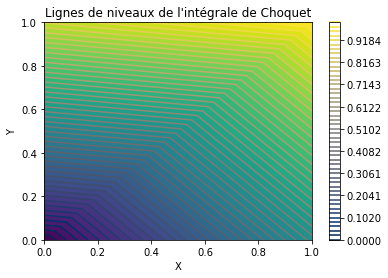

In [194]:
def lignes_niveaux_integrale_choquet(dico_mu):
    x1 = np.linspace(0, 1, 500)
    x2 = np.linspace(0, 1, 500)


    X, Y = np.meshgrid(x1, x2)
    Z = np.zeros_like(X)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            if X[i, j]<= Y[i, j] : 
                Z[i, j] = integrale_choquet([X[i, j], Y[i, j]], dico_mu)
            if X[i, j]> Y[i, j] : 
                Z[i, j] = integrale_choquet([X[i, j], Y[i, j]], dico_mu)
    levels = np.linspace(Z.min(), Z.max(), 50)
    plt.contourf(X, Y, Z, levels=levels,cmap='viridis')
    plt.contour(X, Y, Z, levels=levels, cmap='cividis')
    plt.colorbar()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Lignes de niveaux de l\'intégrale de Choquet')
    plt.show()


mu1 = 0.5
mu2 = 0.9
dico_mu = {'[]':0, '[1]':mu1, '[2]':mu2, '[1, 2]':1, '[2, 1]':1}
lignes_niveaux_integrale_choquet(dico_mu)

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

On oberve ici que les intégrales de Choquet sont très expressives. En effet, elles dépendent à la fois de l'ordre et de la valeur des élémenents. On peut donc exprimer des préférences de façon non linéaire.    
Ici, on observe que l'objectif est de valoriser au plus le cas de figure où x2 est le plus élevé.  
En effet, si x1 < x2 (triangle supérieur gauche) on valorise très fortement x2 en lui donnant un poids de mu1 = 0.9 et en donnant à x1 un poids de 0.1.  
Néanmoins si x2 > x1 (triangle inférieur droit), on donne à chacun un poids de mu2 = 0.5. 

On peut également noter qu'une intégrale de Choquet est un OWA lorsque le w(i) dans OWA est égal à mu( A(sig(i)) - A(sig(i + 1)) )  dans les intégrales de Choquet. 

<div>
</div>

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [41]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [42]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [43]:
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=42)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [45]:
feature_names = breast_cancer.feature_names
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [46]:
target_names = breast_cancer.target_names
target_names

array(['malignant', 'benign'], dtype='<U9')

## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [47]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [48]:
y_pred = logreg.predict(X_test)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

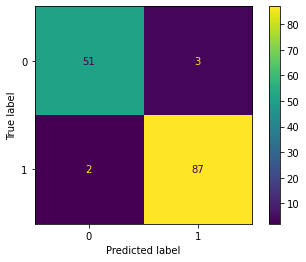

In [49]:
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot()
plt.show()

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [50]:
f1_score(y_test, y_pred, average='binary')

0.9720670391061451

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

<AxesSubplot:>

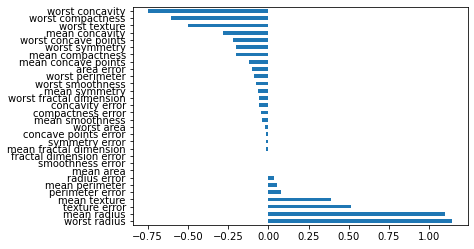

In [51]:
import pandas as pd
coefs = logreg.coef_[0]
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

<AxesSubplot:>

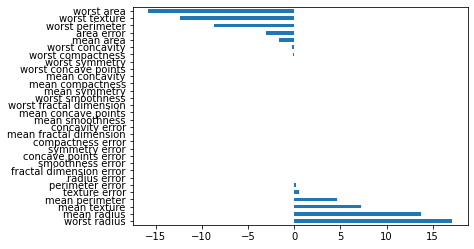

In [52]:
coefs = logreg.coef_[0]
features_first = coefs * X_test[0]
pd.Series(features_first, index=feature_names).nlargest(coefs.size).plot(kind='barh')

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

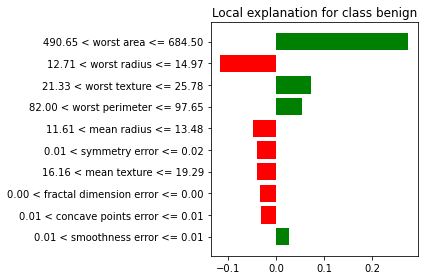

In [121]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

Ici, on oberve que les deux attributs qui importent le plus pour la prédiction de bénignité sont les attributs :  
- "worst area" qui contribue fortement et positivement avec une prédiction bénigne (donc une worst area comprise entre les valeurs 490.65 et 684.50 contribue fortement à donner un diagnostic bénin de la tumeur).  
- "worst radius" qui contribue négativement avec une prédiction bénigne (donc un worst radius compris entre 12.71 et 14.97 contribue fortement à dire que le diagnostic n'est pas bénin).

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

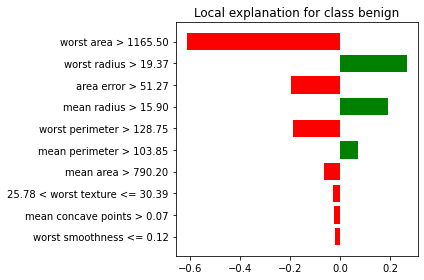

In [54]:
exp = explainer.explain_instance(X_test[1], logreg.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

Ici, on oberve que les deux attributs qui importent le plus pour la prédiction de bénignité sont les attributs :  
- "worst area" qui contribue fortement et négativement avec une prédiction bénigne (donc une worst area supérieure à 1165.50 contribue fortement avec un diagnostic bénin de la tumeur).  
- "worst radius" qui contribue positivement avec une prédiction bénigne (donc un worst radius supérieur à 19.37 qui contribue à dire que le diagnostic est non bégnin)

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

### Comparaison des explications par rapport au classifieur

Nous allons tout d'abord chercher à vérifier la stabilité des explication de LIME données en fonction de trois classifieurs : SVM, random forest et KNN. Dans le cas de random forest et KNN on étudiera également le rôle de la profondeur de l'arbre et du nombre de voisins considérés respectivement. Pour cela nous allons chercher à expliquer un même exemple après un apprentissage et un classification par ces différents classifieurs. 

In [55]:
from sklearn import  svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### SVM

In [56]:
clf_svm = svm.SVC(probability=True)
clf_svm.fit(X_train, y_train)

SVC(probability=True)

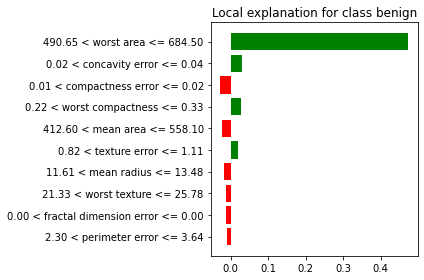

In [67]:
exp = explainer.explain_instance(X_test[0], clf_svm.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

#### Random forest

In [58]:
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

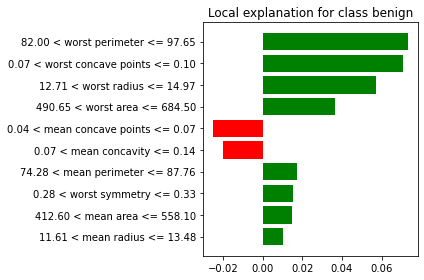

In [59]:
exp = explainer.explain_instance(X_test[0], forest.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

In [60]:
forest = RandomForestClassifier(max_depth=5, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

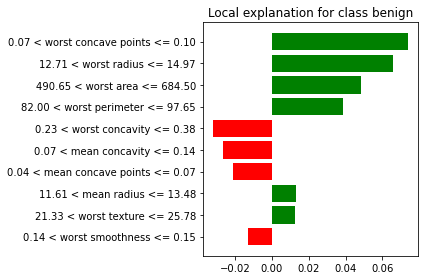

In [61]:
exp = explainer.explain_instance(X_test[0], forest.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

#### KNN

In [62]:
knn = KNeighborsClassifier(n_neighbors=2, algorithm='ball_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)

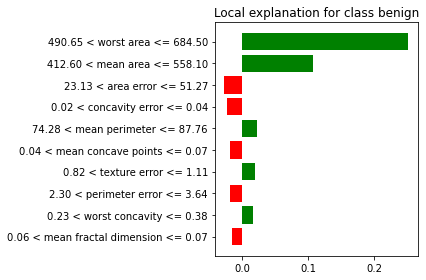

In [63]:
exp = explainer.explain_instance(X_test[0], knn.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

In [64]:
knn = KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

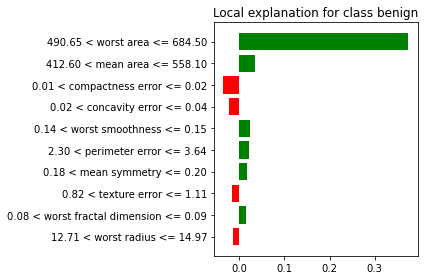

In [122]:
exp = explainer.explain_instance(X_test[0], knn.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

Pour conclure, on observe que les attributs les plus important pour l'explication de sont pas exactement les mêmes selon le classifieur utlisé. On note que la worst area impacte souvent très positivement la prédiction "bénin". Néanmoins, si pour le SVM la "worst area" est presque le seul attribut explicatif pour la classification "bénin", pour les classifieurs random forest et KNN où 2 voisins sont considérés d'autres attributs sont également importants. En effet, en particulier pour le classifeur random forest, d'autres attributs contribuent fortement à l'explication : "worst concave point", "mean area" et "worst perimeter" contribuent alors également positivement à la prédiciton de la "bénin".  
Globalement, il semblerait donc y avoir une certaine redondance dans les explications obtenues avec les différents classifieurs. LIME semble donc être stable par rapport au classifieur utilisé. 

### Comparaison des explications pour différents exmemples 

Nous allons désormais nous intéresser au explications fournies pour différents exemples avec un même classifieurs par régression logistique. Pour cela nous allons regarder les résultats obtenus pour trois exemples correspondant à une prédiction de classe 0 (tumeur bénigne) et trois exemples correspondant à une prédiction de classe 1 (tumeur maligne).

In [90]:
yhat = logreg.predict(X_test)
idx0 = np.where(yhat==0)
idx1 = np.where(yhat==1)

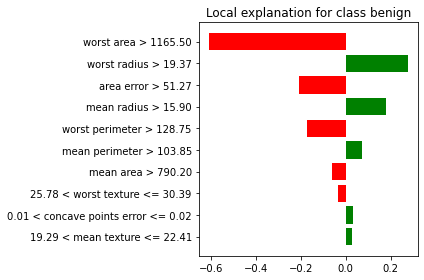

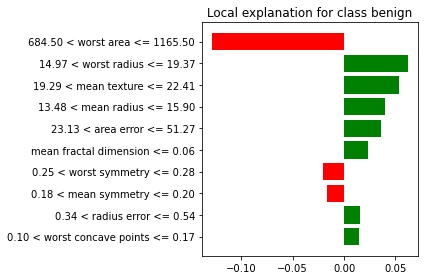

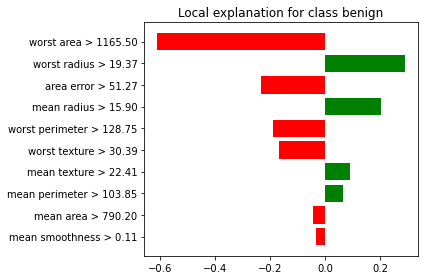

In [123]:
exp0_1 = explainer.explain_instance(X_test[idx0[0][0]], logreg.predict_proba, num_features=10)
exp0_2 = explainer.explain_instance(X_test[idx0[0][1]], logreg.predict_proba, num_features=10)
exp0_3 = explainer.explain_instance(X_test[idx0[0][2]], logreg.predict_proba, num_features=10)

exp0_1.as_pyplot_figure()
plt.tight_layout()

exp0_2.as_pyplot_figure()
plt.tight_layout()


exp0_3.as_pyplot_figure()
plt.tight_layout()


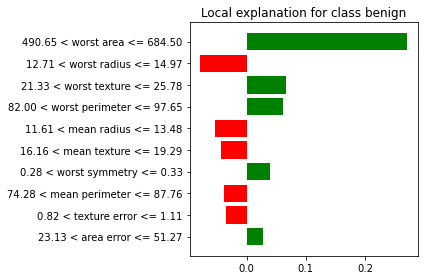

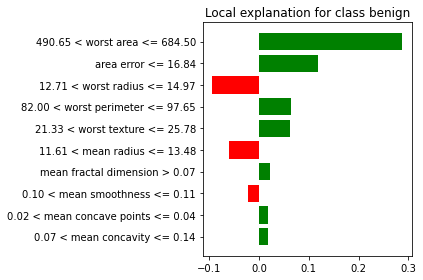

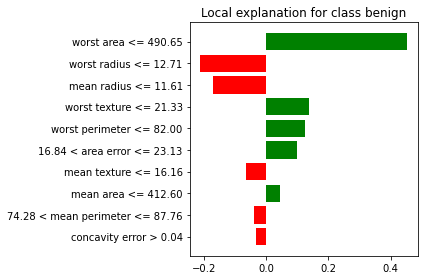

In [125]:
exp1_1 = explainer.explain_instance(X_test[idx1[0][0]], logreg.predict_proba, num_features=10)
exp1_2 = explainer.explain_instance(X_test[idx1[0][1]], logreg.predict_proba, num_features=10)
exp1_3 = explainer.explain_instance(X_test[idx1[0][2]], logreg.predict_proba, num_features=10)

exp1_1.as_pyplot_figure()
plt.tight_layout()

exp1_2.as_pyplot_figure()
plt.tight_layout()

exp1_3.as_pyplot_figure()
plt.tight_layout()

On observe ici que les explications données par LIME dépendent des exemples. On note surtout une grande variabilité des explication entre les classes mais au sein d'une même classe on peut également remarquer une certaine variabilité des explications mais dans une bien moindre mesure. 

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [134]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from time import time

In [148]:

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]


def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6


def load_dataset(verbose=False, remove=()):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # order of labels in `target_names` can be different from `categories`
    target_names = data_train.target_names

    # split target in a training set and a test set
    y_train, y_test = data_train.target, data_test.target

    # Extracting features from the training data using a sparse vectorizer
    t0 = time()
    vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
    X_train = vectorizer.fit_transform(data_train.data)
    duration_train = time() - t0

    # Extracting features from the test data using the same vectorizer
    t0 = time()
    X_test = vectorizer.transform(data_test.data)
    duration_test = time() - t0

    feature_names = vectorizer.get_feature_names_out()

    if verbose:
        # compute size of loaded data
        data_train_size_mb = size_mb(data_train.data)
        data_test_size_mb = size_mb(data_test.data)

        print(
            f"{len(data_train.data)} documents - "
            f"{data_train_size_mb:.2f}MB (training set)"
        )
        print(f"{len(data_test.data)} documents - {data_test_size_mb:.2f}MB (test set)")
        print(f"{len(target_names)} categories")
        print(
            f"vectorize training done in {duration_train:.3f}s "
            f"at {data_train_size_mb / duration_train:.3f}MB/s"
        )
        print(f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")
        print(
            f"vectorize testing done in {duration_test:.3f}s "
            f"at {data_test_size_mb / duration_test:.3f}MB/s"
        )
        print(f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

    return X_train, X_test, y_train, y_test, feature_names, target_names

In [149]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(
    verbose=True
)

2034 documents - 3.98MB (training set)
1353 documents - 2.87MB (test set)
4 categories
vectorize training done in 0.236s at 16.872MB/s
n_samples: 2034, n_features: 7831
vectorize testing done in 0.161s at 17.842MB/s
n_samples: 1353, n_features: 7831


In [158]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [159]:
f1_score(y_test, y_pred, average='weighted')

0.7352085390121542

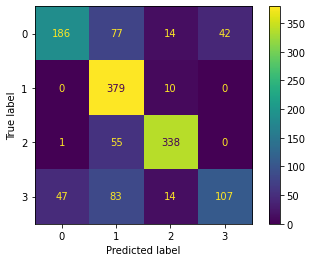

In [163]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

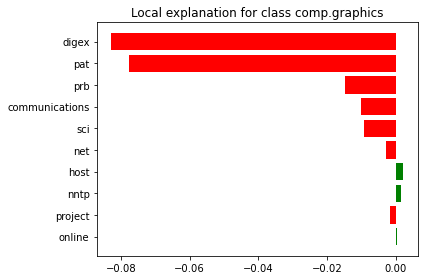

In [165]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[0], clf.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.tight_layout()

In [1]:
exp.as_list()

NameError: name 'exp' is not defined

Les termes tels que 'digex', 'pat' et 'prb' ont fortement influencé la décision négative du modèle. En revanche, les termes avec des poids positifs, comme 'host' et 'mntp', ont également eu un impact mais moindre.

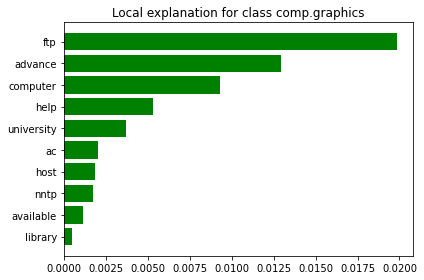

In [167]:
explainer = LimeTabularExplainer(X_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')

exp = explainer.explain_instance(X_test[1], clf.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

In [168]:
exp.as_list()

[('ftp', 0.019828679989216835),
 ('advance', 0.012940703413017795),
 ('computer', 0.009294599994995665),
 ('help', 0.005331293602921395),
 ('university', 0.0037304420793476006),
 ('ac', 0.0020271434139065097),
 ('host', 0.0018794240748259568),
 ('nntp', 0.0017294461428042798),
 ('available', 0.001167851603753),
 ('library', 0.00045933761178808393)]

L'ensemble des dix premiers termes ont fortement influencé la décision du modèle de manière positive. Les termes les plus significatifs sont 'ftp', 'advance' et 'computer'.

## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>

In [3]:
import numpy as np

# Modèle de classification ou de régression (à remplacer par votre propre modèle)
def model_predict(x):
    # Exemple : modèle de classification binaire
    return 1 if x[0] > 0.5 else 0

# Fonction LIME pour trouver les poids optimaux
def find_optimal_weights(Z, f, pi_x):
    # Mise en œuvre de la fonction L(f, g, πx)
    def loss(weights):
        g = np.dot(Z, weights)
        return np.sum(pi_x * (f - g) ** 2)

    # Initialisation des poids avec des valeurs égales (à optimiser)
    initial_weights = np.ones(Z.shape[1])

    # Optimisation des poids avec une méthode d'optimisation appropriée (par exemple, moindres carrés)
    from scipy.optimize import minimize
    result = minimize(loss, initial_weights, method='L-BFGS-B')

    # Récupération des poids optimaux
    optimal_weights = result.x

    return optimal_weights

# Exemple d'utilisation de LIME
def explain_instance(x, model_predict, num_features=10):
    # Générer des échantillons perturbés
    np.random.seed(42)
    m = 1000  # Nombre d'échantillons perturbés
    Z = np.random.rand(m, len(x))  # Exemple simple : perturbation aléatoire

    # Prédictions du modèle sur les échantillons perturbés
    predictions = np.array([model_predict(z) for z in Z])

    # Poids optimaux
    optimal_weights = find_optimal_weights(Z, predictions, np.ones(m) / m)

    # Sélectionner les caractéristiques les plus importantes
    sorted_indices = np.argsort(optimal_weights)[::-1][:num_features]
    explanation = [(i, optimal_weights[i]) for i in sorted_indices]

    return explanation

# Exemple d'utilisation
x_example = [0.6]  # Exemple d'instance à expliquer
explanation = explain_instance(x_example, model_predict, num_features=5)
print(explanation)


[(0, 1.1376754071020938)]
